# Airbnb Data Analysis: Unveiling Insights in Python



Discover the essence of Airbnb with our insightful data analysis project! 🏡📊

**Overview:**
Airbnb, the online marketplace for lodging and tourism experiences, has transformed the way we travel and explore new places. But have you ever wondered what's happening behind the scenes? Our data analysis project unveils the dynamics of Airbnb by digging into its data.

**Project Highlights:**

1. **Data Exploration:** Delve into the world of Airbnb's real estate listings and tourism experiences. Uncover patterns, trends, and hidden insights that shape the platform.

2. **Host Insights:** Gain a deeper understanding of hosts and their offerings. Are there common traits among superhosts? What types of accommodations dominate the listings?

3. **Booking Dynamics:** Analyze booking patterns, popular destinations, and the factors that influence booking decisions. What drives travelers' choices?

4. **Location Impact:** Explore the geographical distribution of Airbnb listings and tourism experiences. Is there a connection between location and pricing?

**How It Works:**
1. **Data Collection:** Gather Airbnb data (available through public datasets or APIs).
2. **Data Preprocessing:** Clean and prepare the data for analysis.
3. **Exploratory Analysis:** Utilize Python libraries (e.g., Pandas, Matplotlib) to explore trends and insights.
4. **Visualizations:** Create compelling visuals that showcase the data's story.
5. **Insight Extraction:** Draw meaningful conclusions from the analysis.


![](https://miro.medium.com/max/1500/1*8Zcspj5yuoU5jsMv1xL7cg.png)

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset

In [2]:
df = pd.read_csv("new-york-city-airbnb-open-data.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Checking for Null values in the dataset

In [3]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Summary of the dataset

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Data Preprocessing

- Replacing null values in the column **reviews_per_month** with 0 in the dataset

In [6]:
df['reviews_per_month'].fillna(0,inplace = True)

Replacing null values in the column **name** with the character **$** and **hostname** with character **#** in the dataset. Both name and hostname are not the main aspects in our analysis, that's why we have replaced them by some special characters.

In [7]:
df['name'].fillna("$",inplace=True)
df['host_name'].fillna("#",inplace=True)

Dropping the column **last review** as more than 10,000 data points contains null values.

In [8]:
df.drop(['last_review'],axis=1,inplace=True)

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Unique neighbourhoods

These are the different unique neighbourhoods in the 4 different neighbourhood groups including Brooklyn, Manhattan, Queens, Staten Islands, Bronx.

In [10]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

# Univariate Analysis

## Different Neighbourhood groups

The following plot represents the count of Airbnb's in the different neighbourhood groups. From the plot, we can easily visualize that maximum number of houses or apartments listed on Airbnb is in 

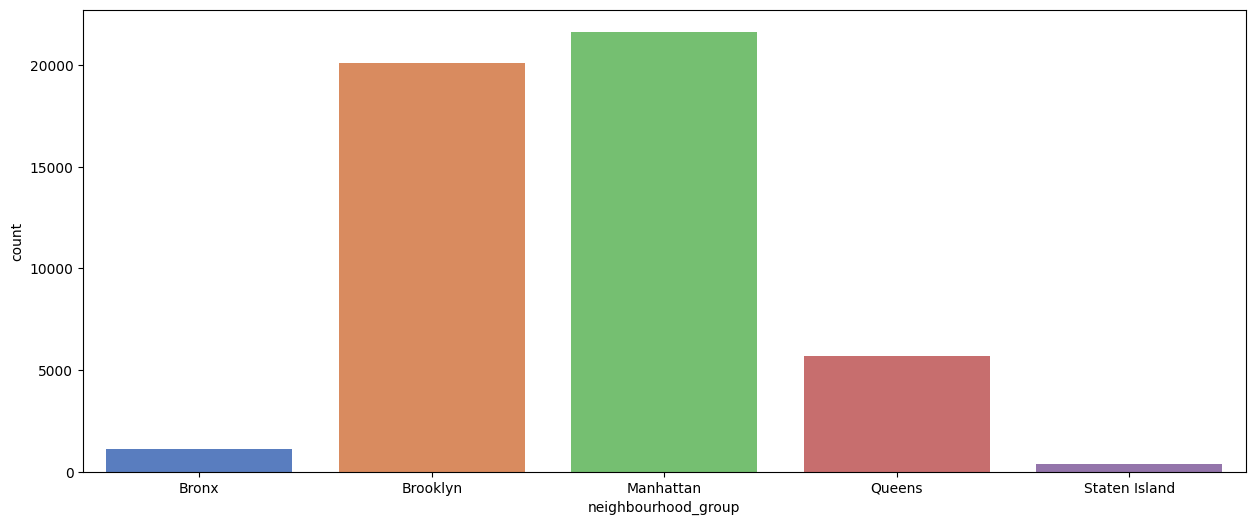

In [11]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')

f, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(data=df, x='neighbourhood_group', palette='muted')
plt.show()


## Price Distribution of Airbnb in Brooklyn

The price distribution of Airbnb in Brooklyn averages around 70-500 dollars per night depending upon the neighbourhood.

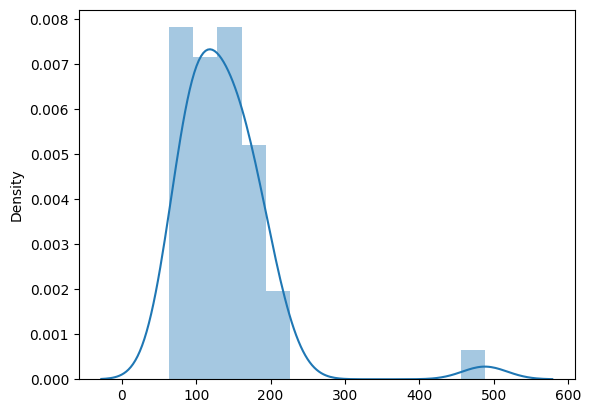

In [12]:
df1 = df[df.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

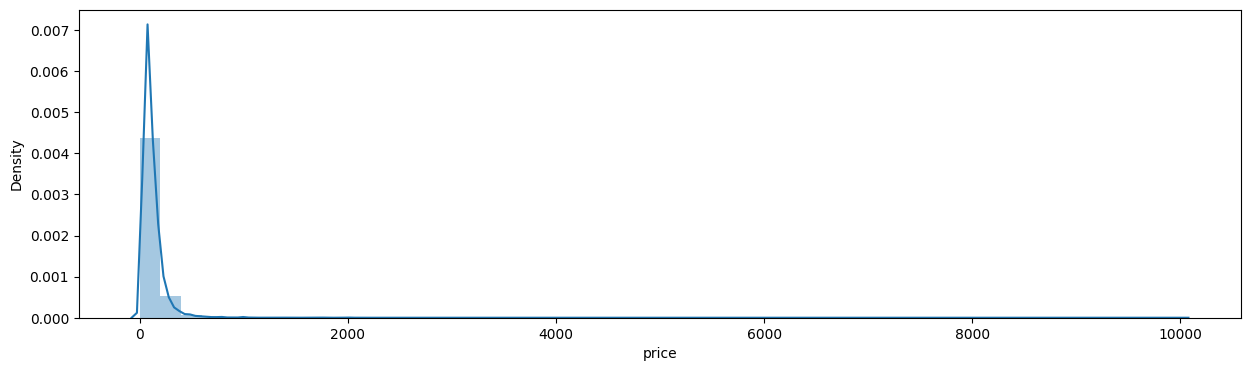

In [13]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Brooklyn"]['price']
sns.distplot(df1)
plt.show()

## Price Distribution of Airbnb in Manhattan

The price distribution of Airbnb in Manhattan averages around 80-490 dollars per night depending upon the neighbourhood.

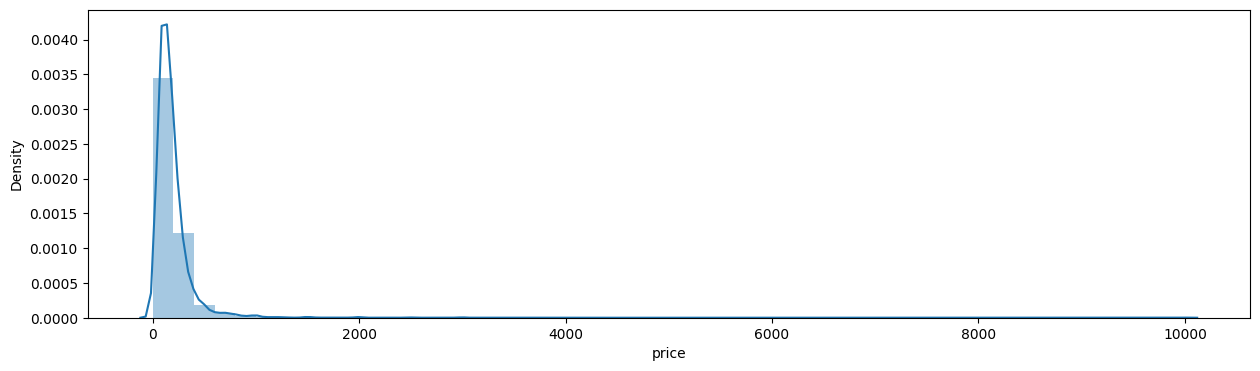

In [14]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Manhattan"]['price']
sns.distplot(df1)
plt.show()

## Price Distribution of Airbnb in Queens

The price distribution of Airbnb in Queens averages around 60-280 dollars per night depending upon the neighbourhood.

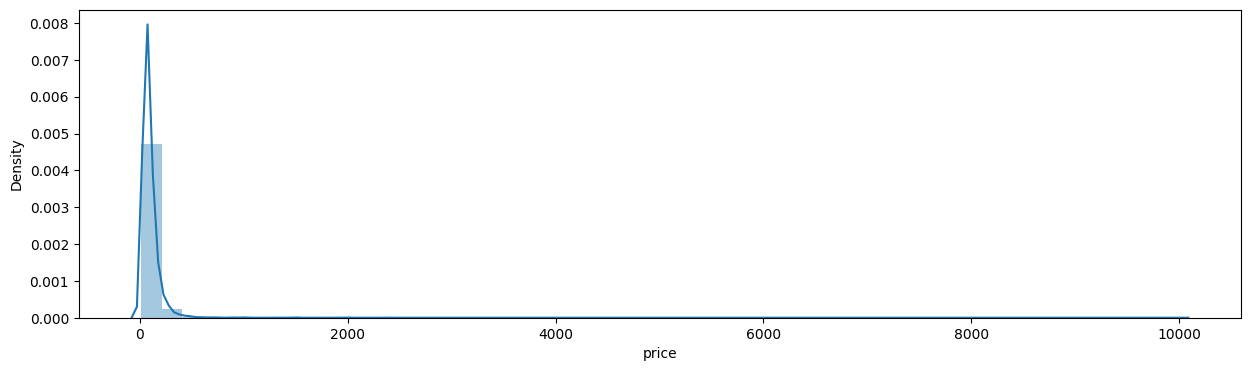

In [15]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Queens"]['price']
sns.distplot(df1)
plt.show()

## Price Distribution of Airbnb in Staten Island

The price distribution of Airbnb in Staten Islands averages around 50-800 dollars per night depending upon the neighbourhood.

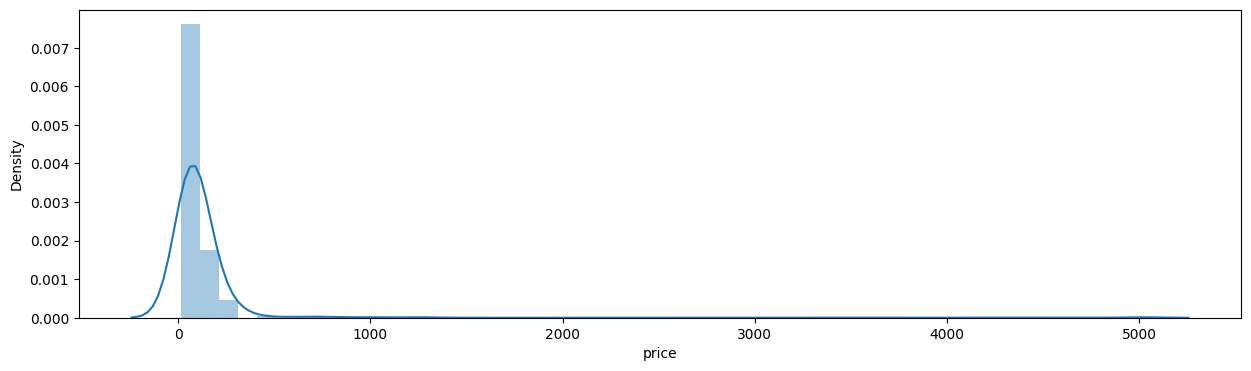

In [16]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Staten Island"]['price']
sns.distplot(df1)
plt.show()

## Price Distribution of Airbnb in Bronx

The price distribution of Airbnb in Bronx averages around 50-450 dollars per night depending upon the neighbourhood.

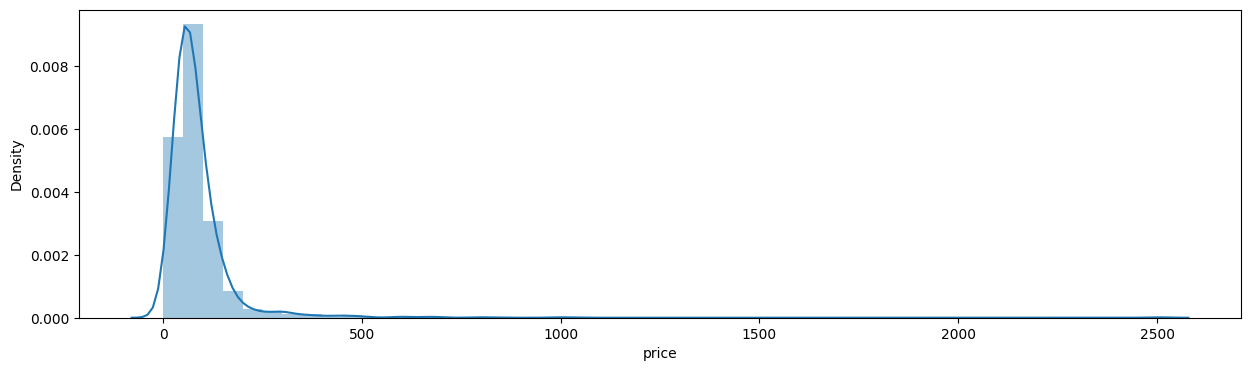

In [17]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Bronx"]['price']
sns.distplot(df1)
plt.show()

## Number of different room types

The maximum number of rooms listed on Airbnb are private rooms and entire home and apartments and a very small number of shared rooms are listed on Airbnb.

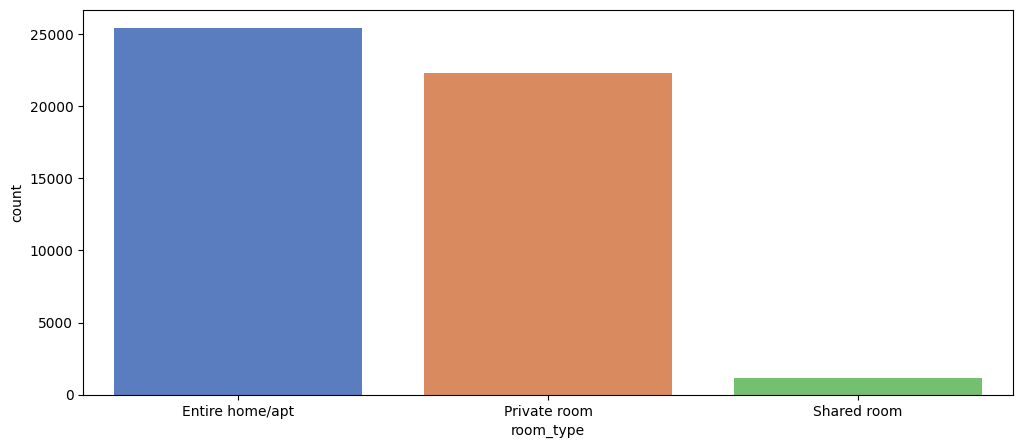

In [18]:

# Convert 'room_type' column to categorical
df['room_type'] = df['room_type'].astype('category')

# Create and show the countplot
f, ax = plt.subplots(figsize=(12, 5))
ax = sns.countplot(data=df, x='room_type', palette='muted')
plt.show()


## Price Distribution of Private rooms

Private rooms on average are prised from 60-120 dollars per night on an average depending upon the neghbourhood group it is loacted.

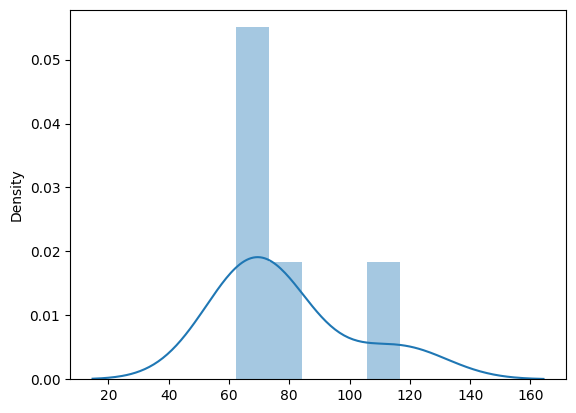

In [19]:
df1 = df[df.room_type == "Private room"][["neighbourhood_group","price"]]
d = df1.groupby("neighbourhood_group").mean()
sns.distplot(d)
plt.show()

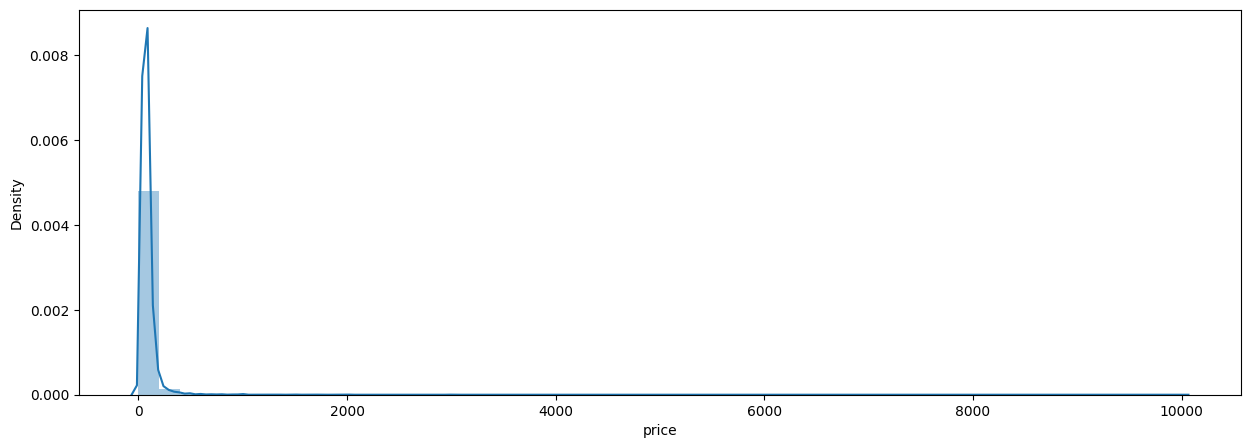

In [20]:
df1 = df[df.room_type=='Private room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

## Price Distribution of Shared rooms

Most of the shared rooms have the price range between 50-70 dollars per night depending upon the neighbourhood groups.

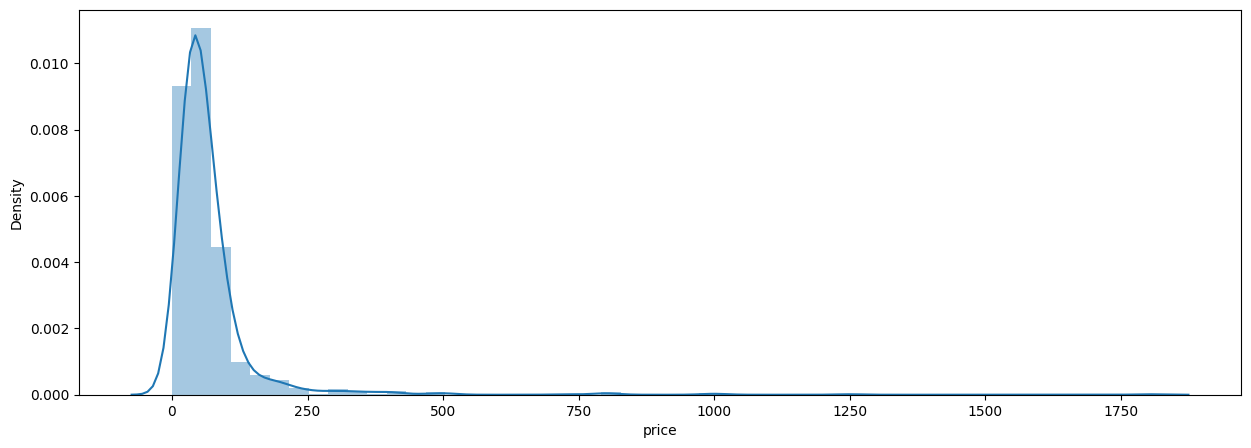

In [21]:
df1 = df[df.room_type=='Shared room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

## Price Distribution of Entire home/apt

The average price of entire home or apartment varies from 120-250 dollars per night depending upon the neighbourhood they given house is situated. 

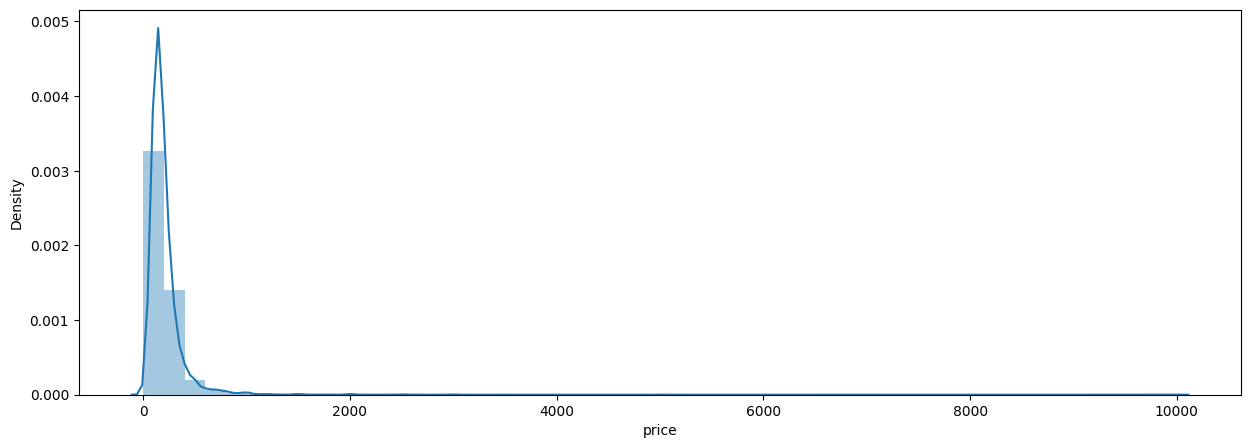

In [22]:
df1 = df[df.room_type=='Entire home/apt']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

## Distribution of Reviews per month

Most of the houses listed on Airbnb has an average of around 1-10 reviews a month and this number may vary sometimes even upto 50.

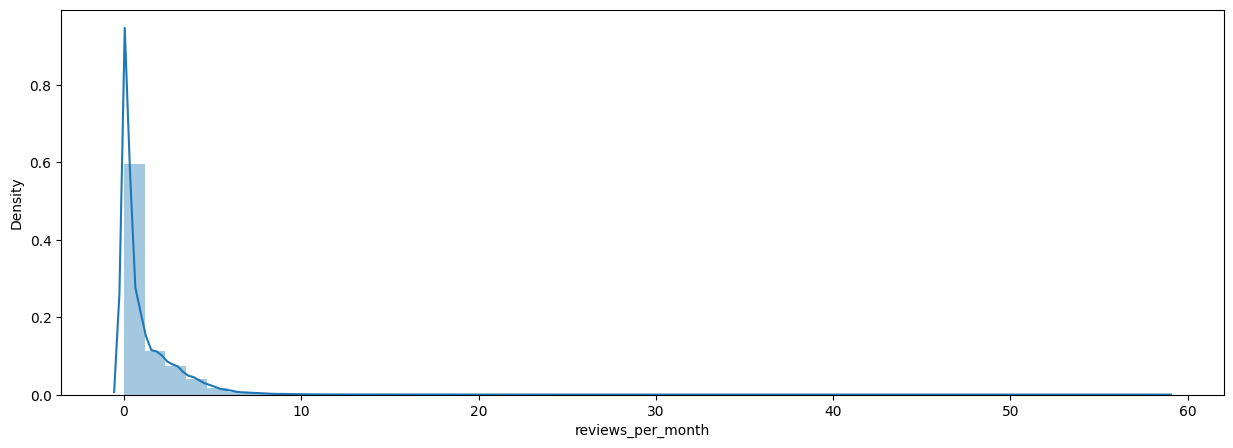

In [23]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df.reviews_per_month)
plt.show()


## Distribution of Availability of rooms

The availability of rooms in different neighbourhood groups and ranges from 0-360.

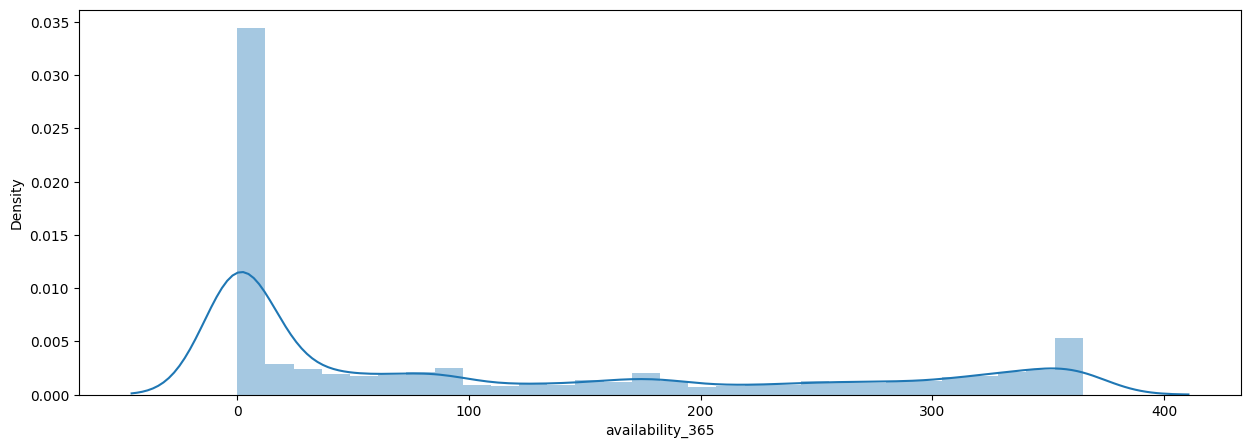

In [24]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df.availability_365)
plt.show()

## Minimum nights people stay in different room types

In the private roooms people mostly stay for around 1-7 days depending upon the neighbourhood groups.

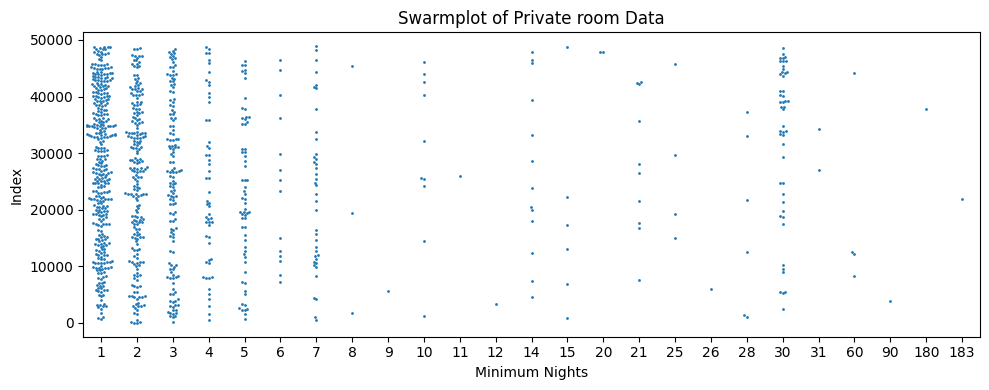

In [25]:
# Filter the DataFrame
selected_room_type = "Private room"
df1 = df[df.room_type == selected_room_type]['minimum_nights']

# Randomly sample a subset of data for plotting
sample_size = 1000  # Adjust this value based on your PC's capabilities and plot readability
sample_indices = random.sample(range(len(df1)), min(sample_size, len(df1)))
sample_data = df1.iloc[sample_indices]

# Create the swarmplot
plt.figure(figsize=(10, 4))
sns.swarmplot(y=sample_data.index, x=sample_data.values, size=2)  # Adjust size as needed

# Customize plot labels and title
plt.xlabel("Minimum Nights")
plt.ylabel("Index")
plt.title(f"Swarmplot of {selected_room_type} Data")

# Show the plot
plt.tight_layout()
plt.show()



Mostly travellers, backpackers and people on low budget like to stay in the shared rooms. They live on an average of 1-2 days as they keep on moving from one place to another.

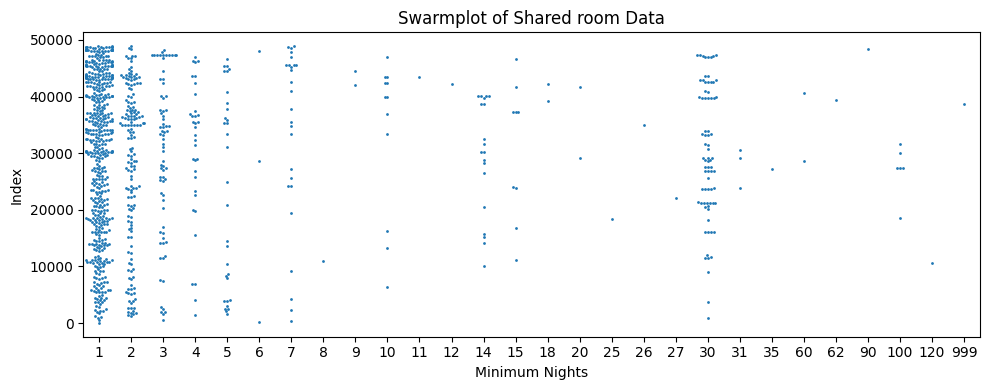

In [26]:
# Filter the DataFrame
selected_room_type = "Shared room"
df1 = df[df.room_type == selected_room_type]['minimum_nights']

# Randomly sample a subset of data for plotting
sample_size = 1000  # Adjust this value based on your PC's capabilities and plot readability
sample_indices = random.sample(range(len(df1)), min(sample_size, len(df1)))
sample_data = df1.iloc[sample_indices]

# Create the swarmplot
plt.figure(figsize=(10, 4))
sns.swarmplot(y=sample_data.index, x=sample_data.values, size=2)  # Adjust size as needed

# Customize plot labels and title
plt.xlabel("Minimum Nights")
plt.ylabel("Index")
plt.title(f"Swarmplot of {selected_room_type} Data")

# Show the plot
plt.tight_layout()
plt.show()



People love to stay in the entire home or apartments as there are least restrictions when they travel with the family or friends. They can prepare their own meals if they want in these apartments. On an average people live in these apartments from 1-90 days.

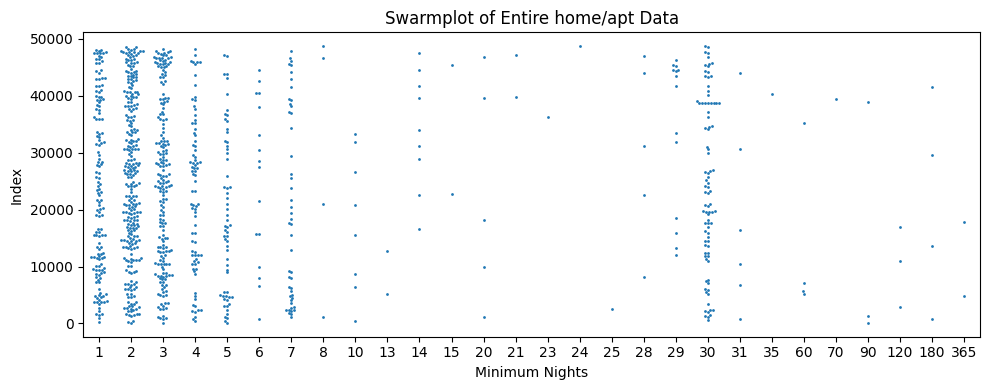

In [27]:
# Filter the DataFrame
selected_room_type = "Entire home/apt"
df1 = df[df.room_type == selected_room_type]['minimum_nights']

# Randomly sample a subset of data for plotting
sample_size = 1000  # Adjust this value based on your PC's capabilities and plot readability
sample_indices = random.sample(range(len(df1)), min(sample_size, len(df1)))
sample_data = df1.iloc[sample_indices]

# Create the swarmplot
plt.figure(figsize=(10, 4))
sns.swarmplot(y=sample_data.index, x=sample_data.values, size=2)  # Adjust size as needed

# Customize plot labels and title
plt.xlabel("Minimum Nights")
plt.ylabel("Index")
plt.title(f"Swarmplot of {selected_room_type} Data")

# Show the plot
plt.tight_layout()
plt.show()



# Bivariate Analysis

## Longitude vs Latitude (representing different neighbourhood groups) 

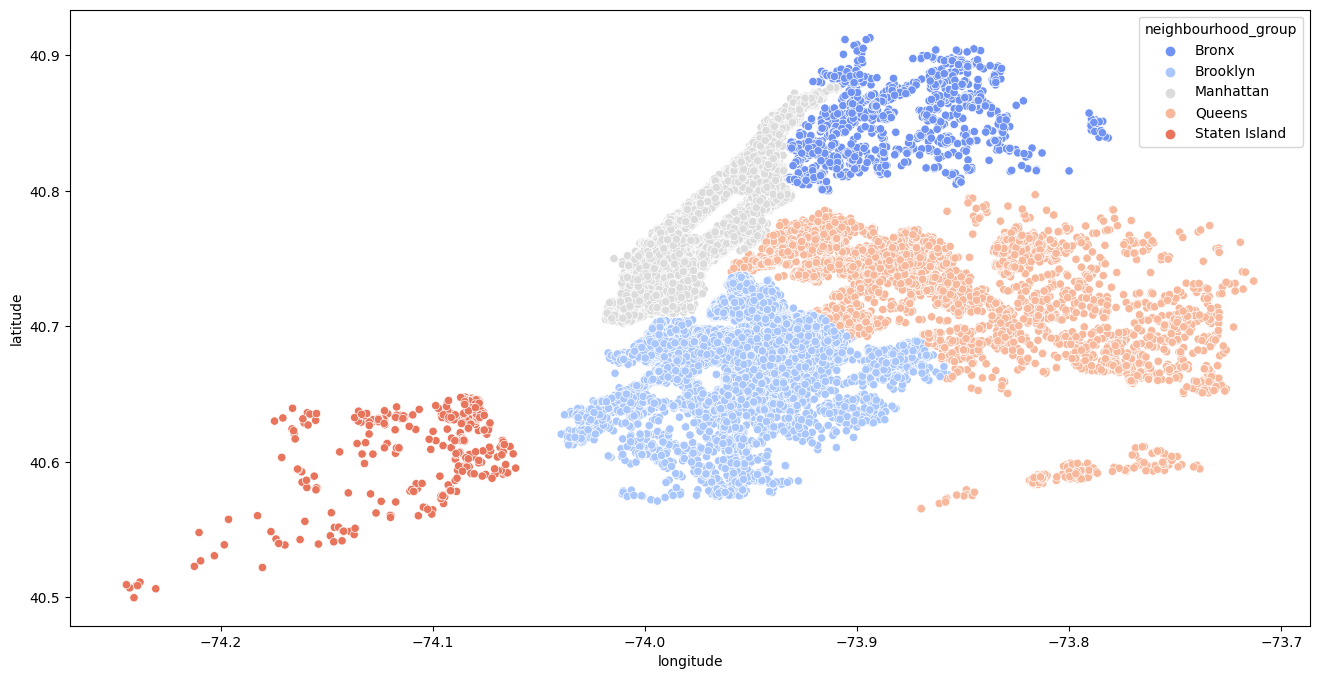

In [28]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group,palette="coolwarm")
plt.show()

## Longitude vs Latitude (representing availability of rooms)

The the given plot we can visualize the number of rooms available in different neighbourhood groups.

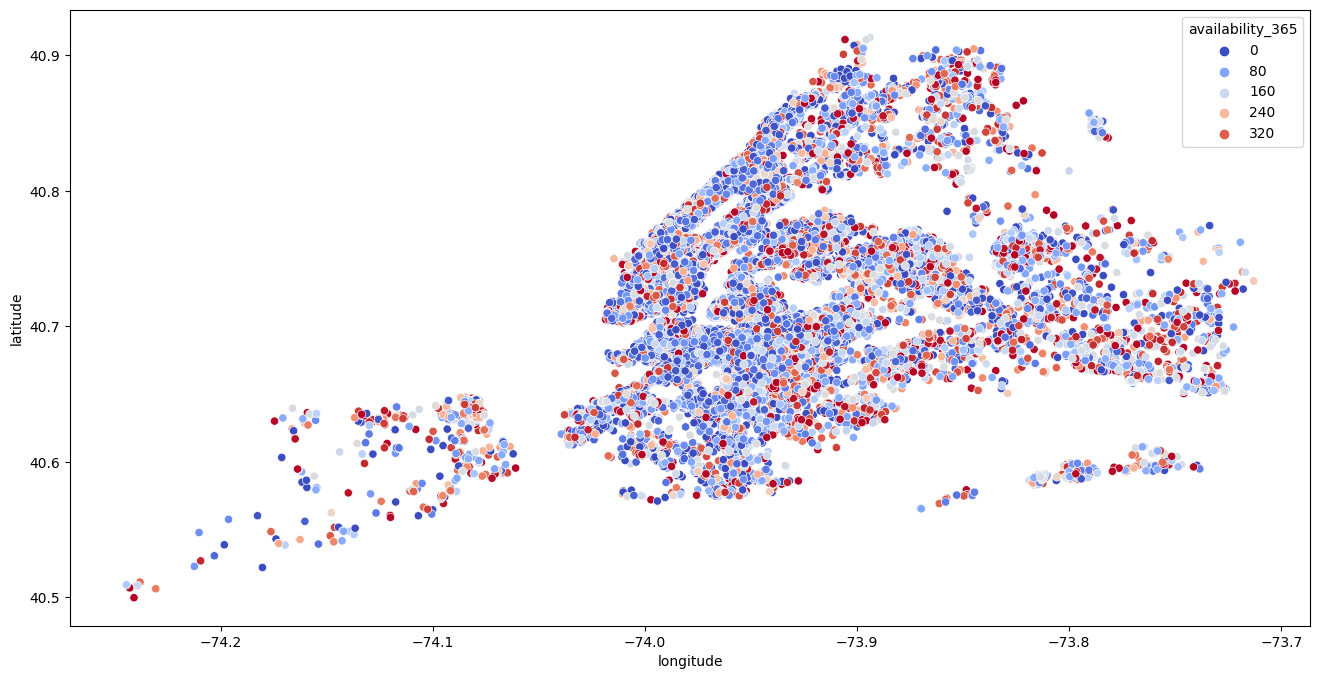

In [29]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.availability_365,palette="coolwarm")
plt.show()

## Top 10 most popular Airbnb hosts 

This is the list of top 10 most popular host in the given neighbourhood groups. Maximum number of people love to stay at their place. The reason behind their popularity may depend upon the price, neighbourhood, cleanliness and many more.

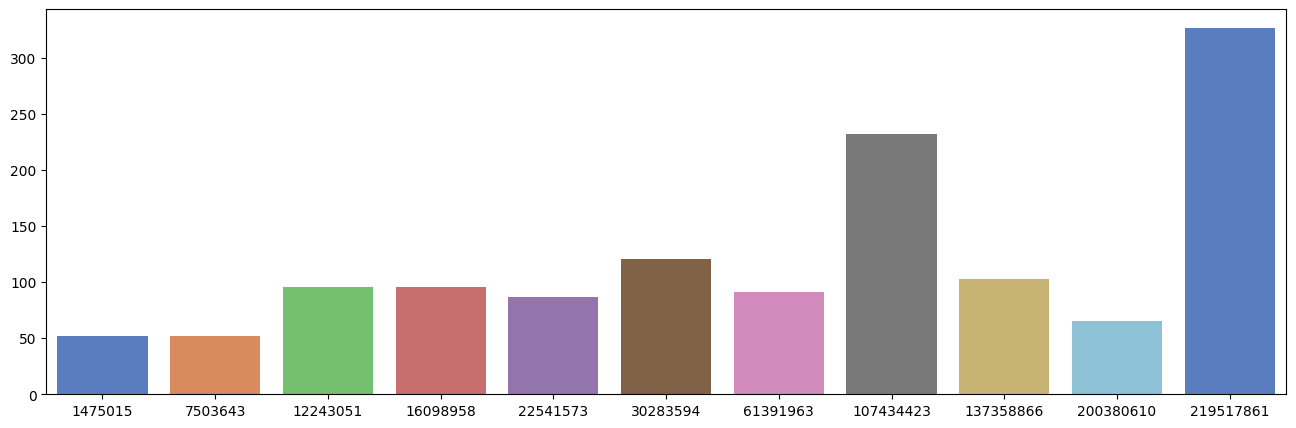

In [30]:
df1 = df.host_id.value_counts()[:11]
f,ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(x = df1.index,y=df1.values,palette="muted")
plt.show()